In [ ]:
import keras
from keras import layers

In [ ]:
encoding_dim = 16
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 3s 13ms/step - loss: 0.3122 - val_loss: 0.2305
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.2061 - val_loss: 0.1873
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1778 - val_loss: 0.1625
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1571 - val_loss: 0.1513
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1494 - val_loss: 0.1455
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1448 - val_loss: 0.1420
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1416 - val_loss: 0.1390
Epoch 8/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1393 - val_loss: 0.1369
Epoch 9/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1373 - val_loss: 0.1351
Epoch 10/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1357 - val_lo

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

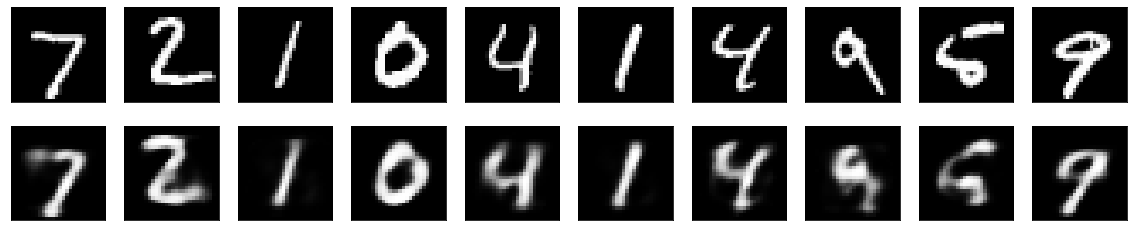

In [32]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

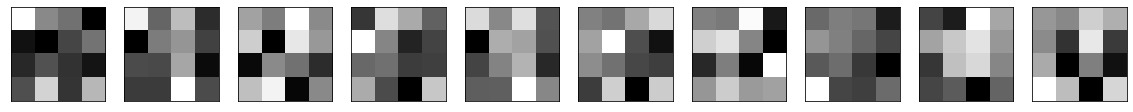

In [33]:
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression
x_enc_train = encoder.predict(x_train)
x_enc_test = encoder.predict(x_test)
modelo = LogisticRegression()
modelo.fit(x_train,y_train)
modeloPCA = LogisticRegression()
modeloPCA.fit(x_enc_train,y_train)
print(modelo.score(x_test,y_test)*100)
print(modeloPCA.score(x_enc_test,y_test)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


92.56
86.47


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
